<a href="https://colab.research.google.com/github/graciousgift/Assignment-file/blob/main/Gift's_of_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Name: Gift Lawrence Maren

<br>



In [9]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

In [10]:
#load csv data
df = pd.read_csv("salary (2).csv")
df.head(5)

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Used to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression
# Feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
RANDOM_STATE = 123
TEST_SIZE = 0.2


> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [12]:
# solution to number 1
df_1= df.copy()
col_to_drop = ["Relationship", "Race", "Country", "Education", "Marital_status", "Occupation", "Workclass"]
df_1.drop(columns=col_to_drop, inplace=True)
df_1.head()

,Age,Final_weight,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Salary
0,50,83311,13,Male,0,0,13,<=50K
1,38,215646,9,Male,0,0,40,<=50K
2,53,234721,7,Male,0,0,40,<=50K
3,28,338409,13,Female,0,0,40,<=50K
4,37,284582,14,Female,0,0,40,<=50K


In [13]:
#checking for missing values
df_1.isna().sum()

Age               0
Final_weight      0
Education_num     0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Salary            0
dtype: int64

In [14]:
df_1.shape

(32560, 8)

In [15]:
df["Salary"].value_counts(normalize=True).mul(100)

 <=50K    75.918305
 >50K     24.081695
Name: Salary, dtype: float64

In [16]:
 #adding target
TARGET = "Salary"
#Matrix

X = df_1.drop(columns=[TARGET])
#Vector
y = df_1[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 7), (6512, 7))

In [17]:
y_train.head(), y_test.head()

(6994      <=50K
 17064     <=50K
 18434     <=50K
 3294      <=50K
 31316     <=50K
 Name: Salary, dtype: object,
 20712     <=50K
 13495     <=50K
 12367     <=50K
 22401      >50K
 18338     <=50K
 Name: Salary, dtype: object)

In [18]:
X_train.head()

,Age,Final_weight,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week
6994,20,168863,10,Female,0,0,20
17064,22,270436,9,Male,0,0,40
18434,36,405644,9,Male,0,0,35
3294,22,51136,10,Female,0,0,60
31316,23,50953,10,Female,0,0,40


In [19]:
X_test.head()

,Age,Final_weight,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week
20712,55,199713,13,Male,0,0,15
13495,34,394447,13,Male,2463,0,50
12367,24,108495,10,Male,0,0,40
22401,53,231472,16,Male,0,0,40
18338,25,123586,10,Male,0,0,40


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#Split data

cols_to_scale = ["Age", "Final_weight"]
cols_to_enc = ["Education_num", "Sex", "Capital_gain", "Capital_loss", "Hours_per_week"]
# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")
scaler = MinMaxScaler()

col_transform = ColumnTransformer(
    transformers=[("ohe", ohe, cols_to_enc), ("scaler", scaler, cols_to_scale)],
    remainder="passthrough",

)

col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Education_num', 'Sex', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week']),
                                ('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight'])])

In [21]:
# Init part
logit = LogisticRegression(random_state=RANDOM_STATE)
pipe_logit = Pipeline(
     steps=[
         # The Column Transformer
         ("col_transform", col_transform),
         # The Log Model
         ("logit", logit),
     ]
)
pipe_logit

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Education_num', 'Sex',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight'])])),
                ('logit', LogisticRegression(random_state=123))])

In [22]:
# Fit
pipe_logit.fit(X_train, y_train)

# Making predictions
y_pred = pipe_logit.predict(X_test)

# Probability of the salary
y_prob = pipe_logit.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [24]:
y_prob

array([0.21321918, 0.3486422 , 0.11632618, ..., 0.13236189, 0.00503311,
       0.07080514])

In [25]:
y_test.value_counts(normalize=True)

 <=50K    0.763206
 >50K     0.236794
Name: Salary, dtype: float64

In [26]:
#setting labels
labels = [0, 1]
labels = ["<=50K", ">50K"]

con_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
con_matrix

array([[4796,  174],
       [ 798,  744]])

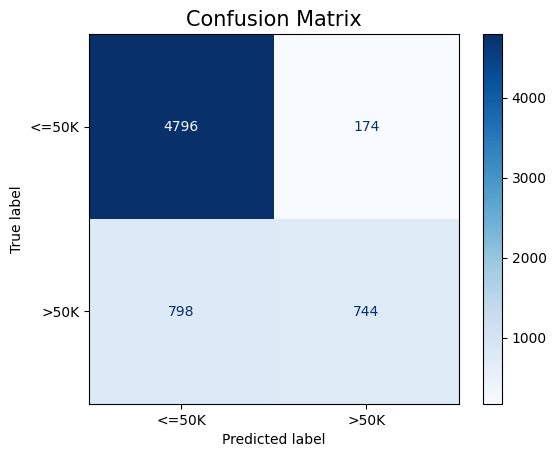

In [27]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt

dp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=con_matrix, display_labels=labels
)
# Display Confusion Matix
dp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

In [28]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4970
        >50K       0.81      0.48      0.60      1542

    accuracy                           0.85      6512
   macro avg       0.83      0.72      0.76      6512
weighted avg       0.85      0.85      0.84      6512



In [33]:
# Model 1
auc_score_1 = metrics.roc_auc_score(y_true=y_test, y_score=y_prob)
auc_score_1

0.8787417109661861

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_proba_1)

auc_score_1 = metrics.auc(fpr, tpr)
auc_score_1
# still trying to figure this part out. my knowledge on this topic is really below average. will update my assignment once i undertsand it better

NameError: ignored

In [40]:
 from sklearn.datasets import make_regression
 from sklearn.linear_model import LinearRegression
 from sklearn.model_selection import cross_validate
...
 X, y = make_regression(n_samples=1000, random_state=0)
 lr = LinearRegression()
...
 result = cross_validate(lr, X, y)  # defaults to 5-fold CV
 result['test_score']  # r_squared score is high because dataset is easy


array([1., 1., 1., 1., 1.])

In [51]:
 from sklearn.datasets import fetch_california_housing
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.model_selection import RandomizedSearchCV
 from sklearn.model_selection import train_test_split
 from scipy.stats import randint
...
 X, y = fetch_california_housing(return_X_y=True)
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
...
 # define the parameter space that will be searched over
 param_distributions = {'n_estimators': randint(1, 5),'max_depth': randint(5, 10)}
...
 # now create a searchCV object and fit it to the data
 search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),n_iter=5, 
                             param_distributions=param_distributions,
                             random_state=0)
 search.fit(X_train, y_train)
RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': ...,
                                        'n_estimators': ...},
                   random_state=0)
 search.best_params_
{'max_depth': 9, 'n_estimators': 4}

 # the search object now acts like a normal random forest estimator
 # with max_depth=9 and n_estimators=4
 search.score(X_test, y_test)


0.735363411343253